06-주성분분석(PCA)의 설명을 참고

# 패키지

In [1]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
from helper import my_ols, scalling, get_best_features

# 문제1 (스케일링)

## 데이터 준비

In [2]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


## 데이터 표준화

머신러닝의 학습 시간과 성능의 개선을 위해 표준화 진행

### `독립변수`에 대한 표준화(스케일링)

In [3]:
x_train = df.drop(['target'], axis=1)
x_train_std=StandardScaler().fit_transform(x_train)
x_train_std_df = DataFrame(x_train_std, columns=x_train.columns)
x_train_std_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


### `종속변수`에 대한 표준화(스케일링)

In [4]:
y_train = df.filter(['target'], axis=1)
y_train_std = StandardScaler().fit_transform(y_train)
y_train_std_df = DataFrame(y_train_std, columns=y_train.columns)
y_train_std_df

,target
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496
...,...
437,0.335904
438,-0.625064
439,-0.261454
440,0.881318


## `전체 요인`에 대한 `회귀분석`

In [5]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)

xnames = list(x_train_std_df.columns)
model1 = my_ols(mdf, y = 'target', x = xnames)
model1.summary

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        16:00:29   Log-Likelihood:                -466.00
No. Observations:                 442   AIC:                             954.0
Df Residuals:                     431   BIC:                             999.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.671e-16      0.033  -4.99e-15      1.000      -0.066       0.066
age           -0.0062      0.037     -0.168      0.867      -0.079       0.066
sex           -0.1481      0.038     -3.917      0.000      -0.222      -0.074
bmi            0.3211      0.041      7.813      0.000       0.240       0.402
bp             0.2004      0.040      4.958      0.000       0.121       0.280
s1            -0.4893      0.257     -1.901      0.058      -0.995       0.017
s2             0.2945      0.209      1.406      0.160      -0.117       0.706
s3             0.0624      0.131      0.475      0.635      -0.196       0.320
s4             0.1094      0.100      1.097      0.273      -0.087       0.305
s5             0.4640      0.106      4.370      0.000       0.255       0.673
s6             0.0418      0.041      1.025      0.306      -0.038       0.122
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결과표

In [6]:
model1.table

B   표준오차  β        t   유의확률        VIF
종속변수   독립변수                                              
target age   -0.0062  0.037  0  -0.168*  0.867   1.217386
       sex   -0.1481  0.038  0  -3.917*  0.000   1.323571
       bmi    0.3211  0.041  0   7.813*  0.000   1.723237
       bp     0.2004  0.040  0   4.958*  0.000   1.542677
       s1    -0.4893  0.257  0  -1.901*  0.058  59.698989
       s2     0.2945  0.209  0   1.406*  0.160  39.373182
       s3     0.0624  0.131  0   0.475*  0.635  15.410233
       s4     0.1094  0.100  0   1.097*  0.273   8.915790
       s5     0.4640  0.106  0   4.370*  0.000  10.522501
       s6     0.0418  0.041  0   1.025*  0.306   1.488241

## `차원 축소` 적용

### `PCA 분석`

In [7]:
pca_model = pca()
fit = pca_model.fit_transform(x_train_std_df)
topfit = fit['topfeat']
topfit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC7,bmi,-0.519874,weak
9,PC2,s2,0.455942,weak


### 선정된 요인 이름 추출

In [8]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['s4', 'age', 's6', 'sex', 's5', 'bp', 's1']

### 선정된 요인을 사용하여 회귀분석 수행

In [9]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
model2 = my_ols(mdf, y='target', x=feature)
model2.summary

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        16:00:30   Log-Likelihood:                -499.57
No. Observations:                 442   AIC:                             1015.
Df Residuals:                     434   BIC:                             1048.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.671e-16      0.036  -4.65e-15      1.000      -0.071       0.071
s4             0.2546      0.052      4.867      0.000       0.152       0.357
age           -0.0053      0.040     -0.135      0.893      -0.083       0.073
s6             0.0927      0.043      2.142      0.033       0.008       0.178
sex           -0.1796      0.040     -4.487      0.000      -0.258      -0.101
s5             0.3970      0.051      7.795      0.000       0.297       0.497
bp             0.2823      0.042      6.709      0.000       0.200       0.365
s1            -0.2216      0.046     -4.834      0.000      -0.312      -0.132
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         3.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 두 가지 모델의 결과 비교

### 결과 비교를 위한 데이터프레임 생성

In [10]:
# DF 설정
rdf = DataFrame({
    's6': mdf['s6'],
    'y': mdf['target'],
    'y1': model1.fit.predict(x_train_std_df),
    'y2': model2.fit.predict(x_train_std_df)
})

rdf

,s6,y,y1,y2
0,-0.370989,-0.014719,0.701028,0.258085
1,-1.938479,-1.001659,-1.091639,-0.909635
2,-0.545154,-0.144580,0.321396,-0.062681
3,-0.196823,0.699513,0.191946,0.259033
4,-0.980568,-0.222496,-0.307396,-0.092375
...,...,...,...,...
437,0.151508,0.335904,0.530922,0.445548
438,0.935254,-0.625064,-0.663297,-0.702843
439,0.325674,-0.261454,-0.401357,-0.339855
440,-0.545154,0.881318,0.775597,0.568153


### melt 함수를 사용해 실제 값과 model1의 예측 결과를 재배치

In [11]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1

,s6,variable,value
0,-0.370989,y,-0.014719
1,-1.938479,y,-1.001659
2,-0.545154,y,-0.144580
3,-0.196823,y,0.699513
4,-0.980568,y,-0.222496
...,...,...,...
879,0.151508,y1,0.530922
880,0.935254,y1,-0.663297
881,0.325674,y1,-0.401357
882,-0.545154,y1,0.775597


### 실제 값과 model2의 예측 결과 재배치

In [12]:
mdf2 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y2'])
mdf2

,s6,variable,value
0,-0.370989,y,-0.014719
1,-1.938479,y,-1.001659
2,-0.545154,y,-0.144580
3,-0.196823,y,0.699513
4,-0.980568,y,-0.222496
...,...,...,...
879,0.151508,y2,0.445548
880,0.935254,y2,-0.702843
881,0.325674,y2,-0.339855
882,-0.545154,y2,0.568153


### 각각의 재배치 결과를 시각화

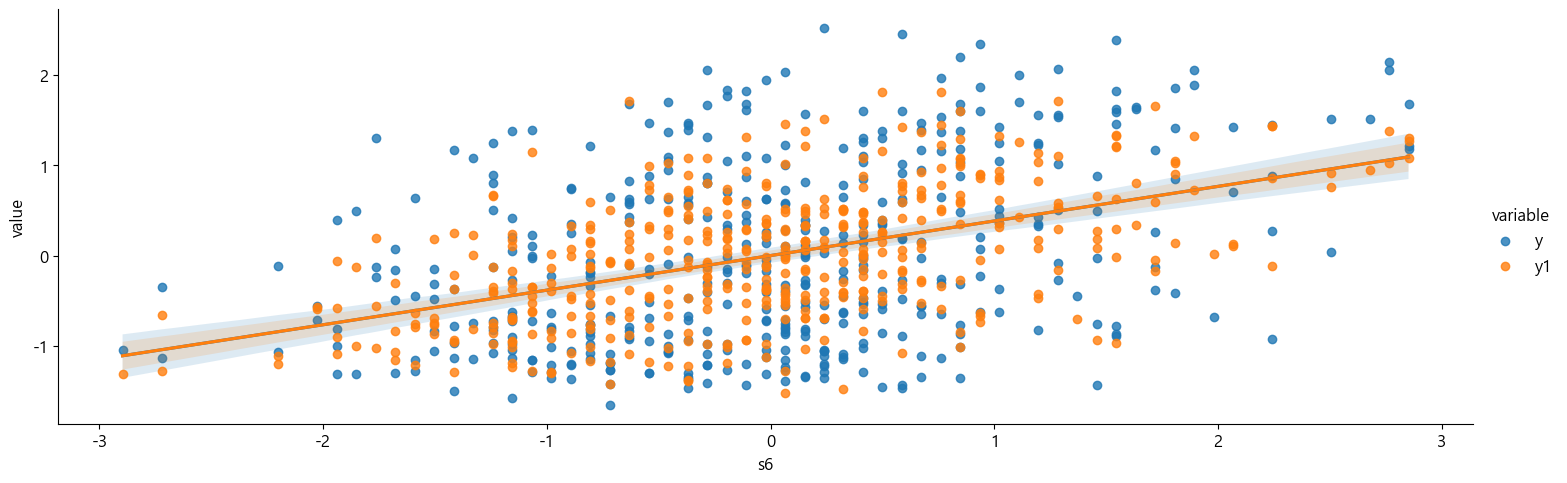

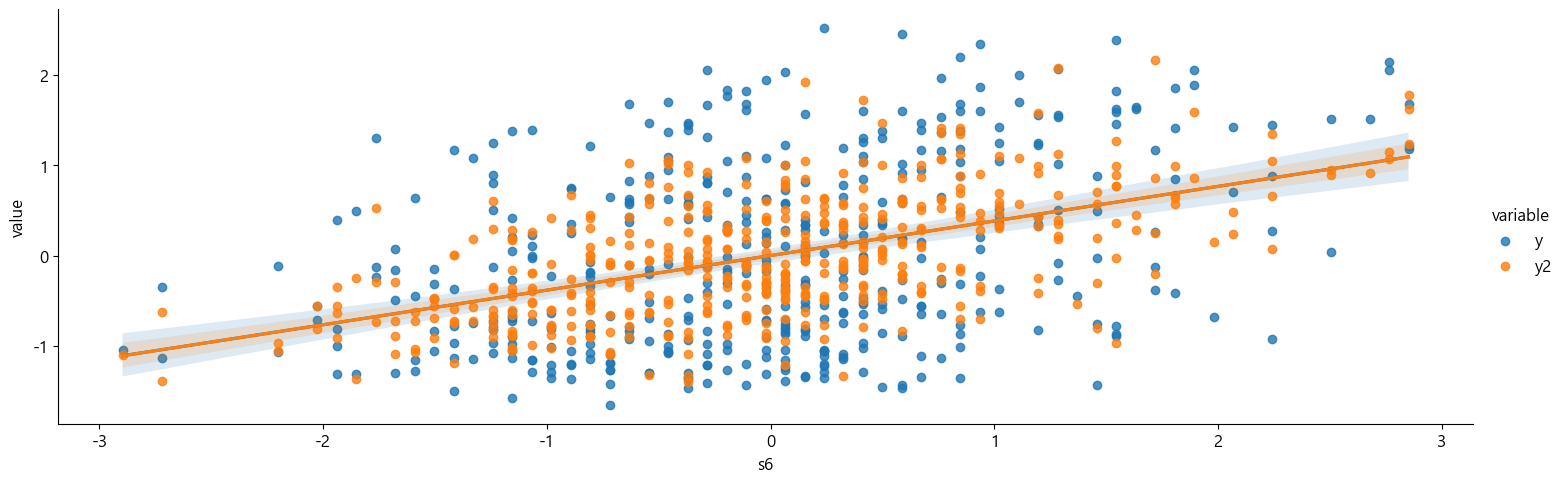

In [13]:
# lmplot은 통합적으로 hue와 추세선을 그릴 수 있는 그래프 함수
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)

plt.show()
plt.close()